In [211]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
from utils import *

import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score, cross_val_predict

## Learning Objectives:
1. MNIST data
    - Pot several images
    - Plot precision & recall (sklearn.metrics precision_recall_curve)
    - Plot ROC, ROC for several models (sklearn.metrics roc_curve)
    - sklearn confusion matrix
    - Plot confusion matrix
    - Add noise to an image with Scipy
2. Titanic data
    - Make a pipeline
    
3. Other:
    - numpy type conversion
    - reshaping numpy arrays
    - saving a classifier/making a copy of it:
        - from sklearn.base import clone
        - cloned_clf = clone(clf)

In [29]:
CHAPTER_ID = "classification"
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
init_images(CHAPTER_ID, PROJECT_ROOT_DIR )

### Load MNIST

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [44]:
X = mnist['data']
y = mnist['target']

#### Show an image

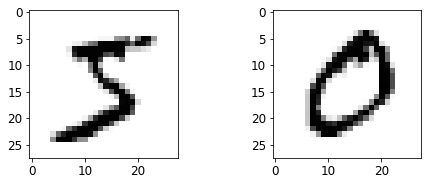

In [23]:
%matplotlib inline
image_1 = X[0].reshape(28, 28)
image_2 = X[1].reshape(28, 28)
plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.imshow(image_1, cmap='Greys')
plt.subplot(222)
plt.imshow(image_2, cmap='Greys')
plt.show()

In [25]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    #plt.axis("off")

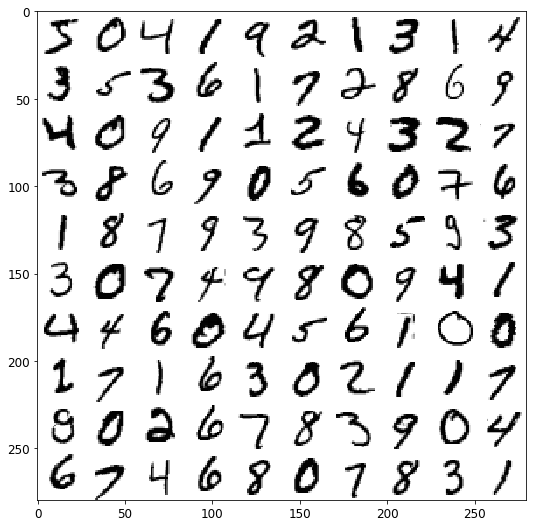

In [39]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

### Make a binary classifier

Select some data first

In [70]:
y = y.astype(np.uint8)

In [71]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [73]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [74]:
from sklearn.linear_model import SGDClassifier

In [75]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Make predictions with cross validations

In [99]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3, method="decision_function")

In [107]:
y_pred[y_pred>0]

array([ 9689.74888835, 14424.64901144, 14391.43940539, ...,
         364.31830198, 19609.06045744, 22570.61455608])

In [104]:
y_train_5

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_pred)

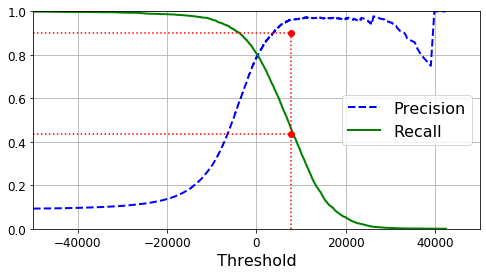

In [102]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.9], "r:")         # Not shown
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      # Not shown
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")# Not shown
plt.plot([7813], [0.9], "ro")                   # Not shown
plt.plot([7813], [0.4368], "ro")                # Not shown
#save_fig("precision_recall_vs_threshold_plot")  # Not shown
plt.show()

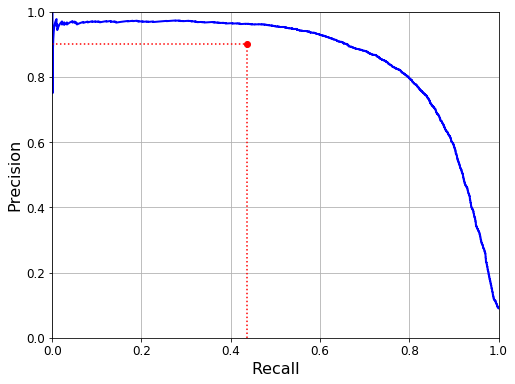

In [108]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

#### ROC curve

In [109]:
from sklearn.metrics import roc_curve

In [111]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_pred)

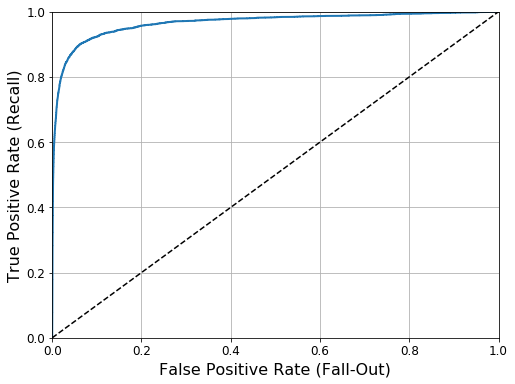

In [115]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

y_pred_rf = cross_val_predict(rf, X_train, y_train_5, cv=3, method='predict_proba')

In [129]:
y_scores_rf = y_pred_rf[:,1] # only the positive class

In [130]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_rf)

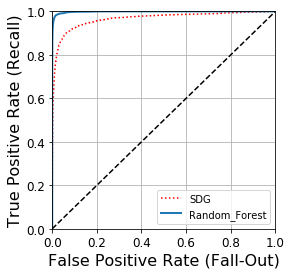

In [137]:
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, 'r:', label='SDG')
plot_roc_curve(fpr_forest, tpr_forest, 'Random_Forest')
plt.legend(loc='lower right')
plt.show()

### Confusion matrix

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
X_train_pred = cross_val_predict(sgd, X_train, y_train, cv=4)

In [141]:
y_train_pred = X_train_pred
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4580,    1,   43,   34,   10,   44,   47,    1,   49,   23],
       [   1, 5278,   41,   39,    5,   35,   13,    6,   80,   16],
       [  40,   49, 4314,  136,   38,   35,   88,   53,  125,   15],
       [  30,   11,  192, 4241,   12,  254,   20,   27,  150,   62],
       [  11,   16,   55,   17, 4179,   29,   49,   47,  108,  266],
       [  56,   18,   40,  208,   38, 3702,   96,   10,  177,   74],
       [  38,    9,   58,   20,   26,   95, 4513,   11,   41,    2],
       [  21,   26,  110,   45,   55,   30,    8, 4448,   43,  319],
       [  34,   79,  131,  317,   21,  323,   43,   15, 3597,  217],
       [  27,   16,   26,   75,  137,   75,    2,  165,  178, 4170]])

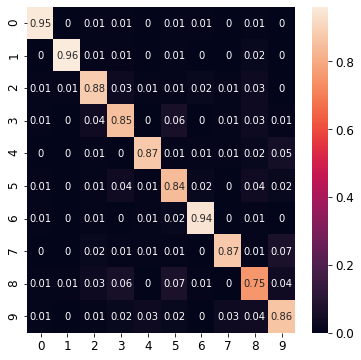

In [158]:
conf_mx_norm = np.round(conf_mx/conf_mx.sum(axis=1), decimals =2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mx_norm, annot=True)
plt.show()

### Shift an image

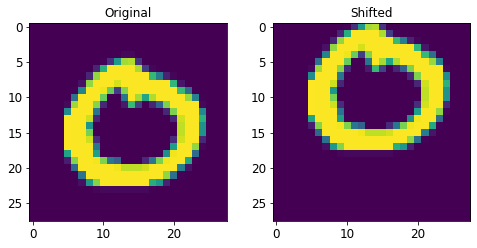

In [171]:
from scipy.ndimage.interpolation import shift

plt.figure(figsize=(8,8))
image = X_train[0].reshape((28, 28))
image_shifted = shift(image, [-5, 0])
plt.subplot(221)
plt.title('Original')
plt.imshow(image)
plt.subplot(222)
plt.title('Shifted')
plt.imshow(image_shifted)

## Load Titanic 

In [177]:
TITANIC_PATH = os.path.join("datasets", "titanic")
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [179]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [178]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Make a class that returns specified columns from a dataframe

In [197]:
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [192]:
num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ('impute_numeric', SimpleImputer(strategy='median'))
])

In [208]:
y_train = train_data["Survived"]

In [195]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [199]:
cat_pipeline = Pipeline([
    ('select_categorical', DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ('impute_categorical', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse=False))
])

cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [213]:
pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

X_train = pipeline.fit_transform(train_data)

pd.DataFrame(X_train).head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,22.0,1.0,0.0,7.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [214]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=20, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8060140733174441